In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("avocado.csv")
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
df.shape

(18249, 14)

The data set has 18249 rows and 14 columns

In [4]:
column=df.columns
column

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
#Dropping the 1st column
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in the dataset has data types of integer,float and object.

integer - year
float - AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags and XLarge Bags
object - Date,type and region

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


All the columns have 18249 non-null values.

In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

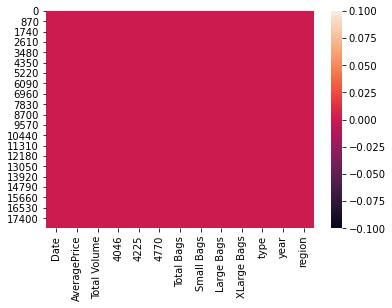

In [9]:
sns.heatmap(df.isnull())

There is no null value in the data set.

In [10]:
#Statistical summary
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

All the columns have 18249 count, so there is no missing values.

The mean is greater than median in Total volume,4770,Large bags and XLarge bags. There is a huge difference between 75th percentile and Max in XLarge bags,so outliers are present.

In [11]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
4046            0.920057    0.925280    0.838645     0.699377  0.003353  
4225            0.905787    0.916031    0.810015     0.688809 -0.009559  
4770            0.792314    0.802733    0.698471     0.679861 -0.036531  
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

<AxesSubplot:>

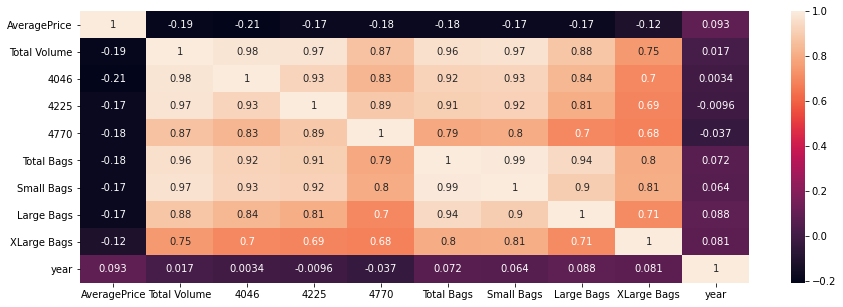

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

The Average price is negatively correlated to all other variables except year.

4046 and Total volume is highly correlated.

4225 and Total volume is highly correlated.

Total bags and Total volume is highly correlated.

Small bags and Total volume is highly correlated.

4225,Total bags and Small bags is highly correlated to 4046.

Total bags and Small bags is highly correlated to 4225.

Small bags and Large bags is highly correlated to Total bags.

Large bags and Small bags is highly correlated.

Data Visualization

In [13]:
col=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']]

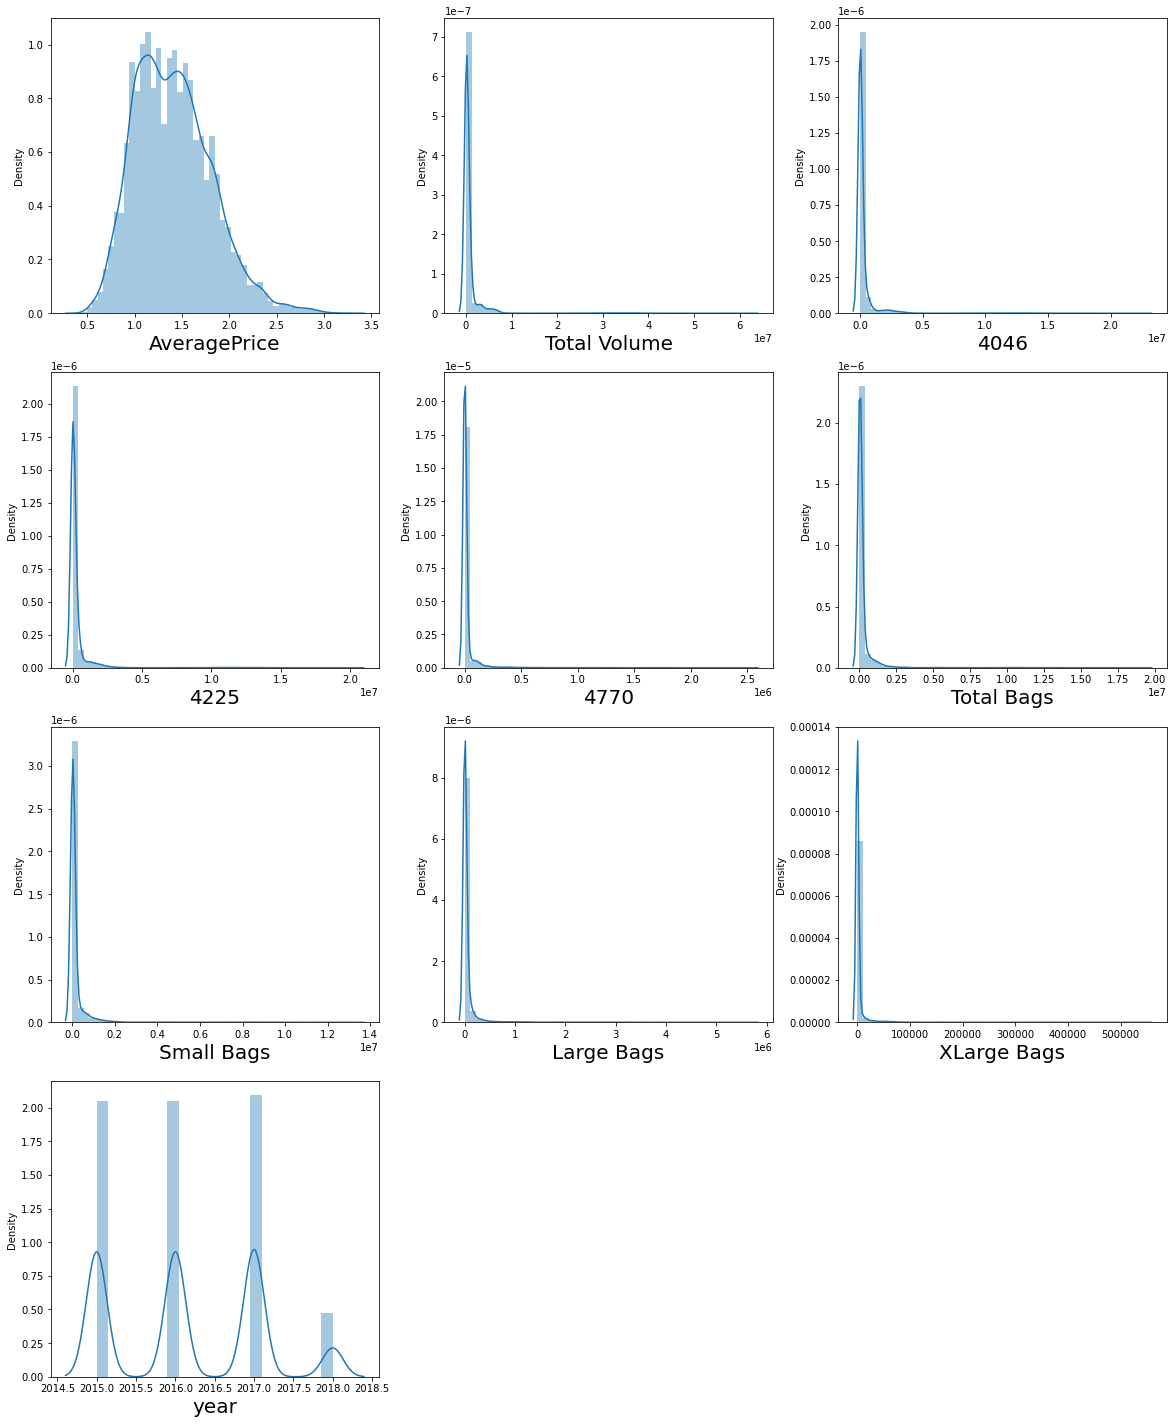

In [14]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in col:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(col[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Skewness is present in Total volume,4046,4225,4770,Total bags,Small bags,Large bags and XLarge bags.

In [16]:
#Removing skewness
df['AveragePrice']=np.sqrt(df['AveragePrice'])
df['Total Volume']=np.log2(df['Total Volume'])
df['4046']=np.sqrt(df['4046'])
df['4225']=np.sqrt(df['4225'])
df['4770']=np.sqrt(df['4770'])
df['Total Bags']=np.sqrt(df['Total Bags'])
df['Small Bags']=np.sqrt(df['Small Bags'])
df['Large Bags']=np.sqrt(df['Large Bags'])
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])

In [17]:
df.skew()

AveragePrice    0.196766
Total Volume    0.087954
4046            3.952972
4225            3.896355
4770            4.128605
Total Bags      4.128864
Small Bags      4.035940
Large Bags      4.134963
XLarge Bags     4.827368
year            0.215339
dtype: float64

In [18]:
df['4046']=np.sqrt(df['4046'])
df['4225']=np.sqrt(df['4225'])
df['4770']=np.sqrt(df['4770'])
df['Total Bags']=np.sqrt(df['Total Bags'])
df['Small Bags']=np.sqrt(df['Small Bags'])
df['Large Bags']=np.sqrt(df['Large Bags'])
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])
col=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']]

In [19]:
df.skew()

AveragePrice    0.196766
Total Volume    0.087954
4046            1.541756
4225            1.387105
4770            1.471863
Total Bags      1.546645
Small Bags      1.436095
Large Bags      1.282049
XLarge Bags     2.042621
year            0.215339
dtype: float64

The skewness is looking good enough.

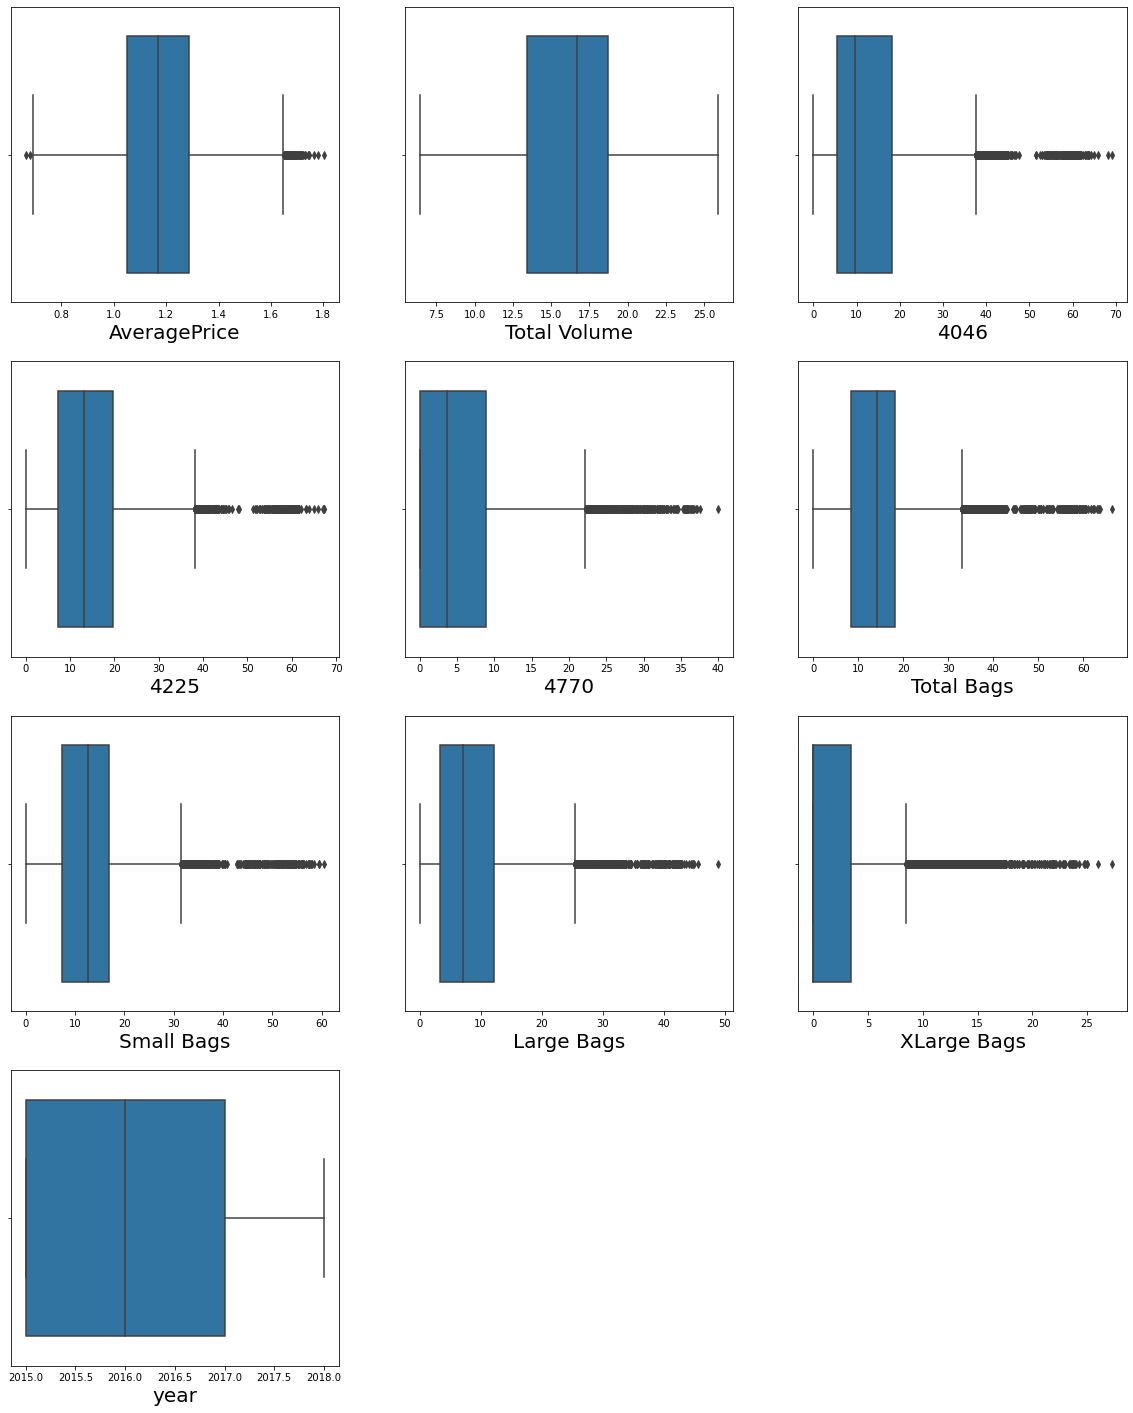

In [20]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in col:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(col[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Outliers are present in Average price,4046,4225,4770,Total bags,Small bags,Large bags and XLarge bags.

conventional    9126
organic         9123
Name: type, dtype: int64

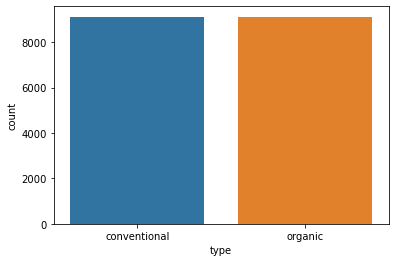

In [21]:
sns.countplot(df['type'])
df['type'].value_counts()

In the data set there are 8126 conventional type avocado and 9123 organic type avocado.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

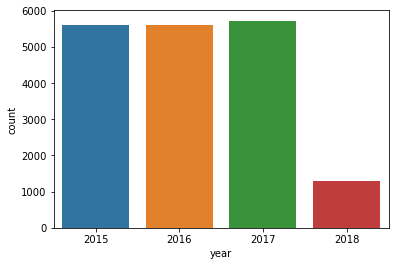

In [22]:
sns.countplot(df['year'])
df['year'].value_counts()

RichmondNorfolk        338
SouthCentral           338
Jacksonville           338
Northeast              338
Midsouth               338
Boise                  338
Syracuse               338
Sacramento             338
Detroit                338
GreatLakes             338
DallasFtWorth          338
Boston                 338
CincinnatiDayton       338
BaltimoreWashington    338
Albany                 338
Denver                 338
Portland               338
Plains                 338
Indianapolis           338
Columbus               338
MiamiFtLauderdale      338
GrandRapids            338
Charlotte              338
SouthCarolina          338
LasVegas               338
Philadelphia           338
LosAngeles             338
Houston                338
RaleighGreensboro      338
NewYork                338
California             338
Roanoke                338
HarrisburgScranton     338
HartfordSpringfield    338
Spokane                338
NorthernNewEngland     338
SanDiego               338
S

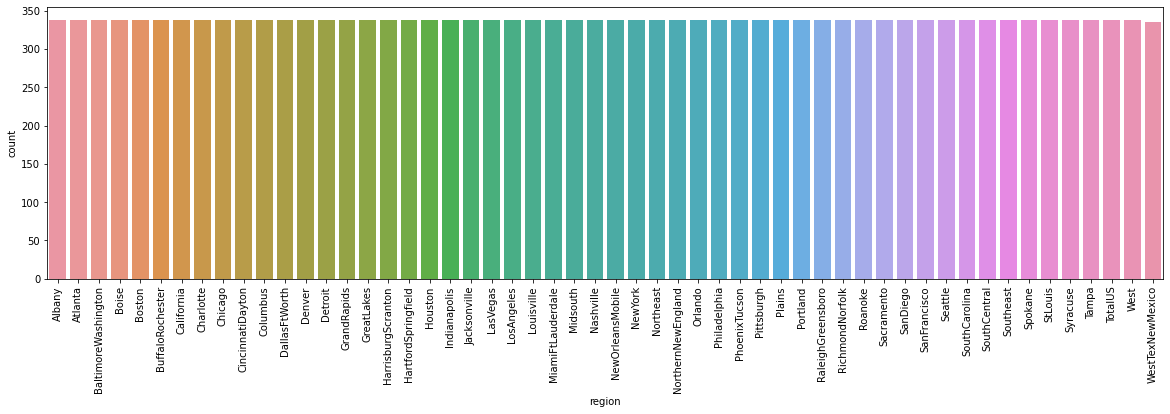

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(df['region'])
plt.xticks(rotation='90')
df['region'].value_counts()

In [24]:
#Date is in object data type coverting to datetime and creating new columns month and day.
df['Date']=pd.to_datetime(df['Date'])
df['Day']= df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df.head()
df=df.drop('Date',axis=1)

In [25]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Day               int64
Month             int64
dtype: object

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

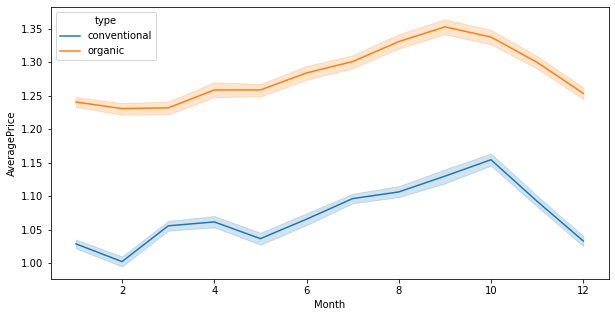

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)

The Average price for conventional and organic type is high in the months 8,9 and 10. Average price is low in 2nd month.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

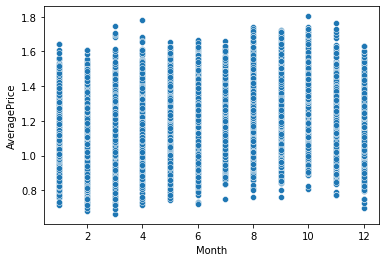

In [27]:
sns.scatterplot(x='Month',y='AveragePrice',data=df)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

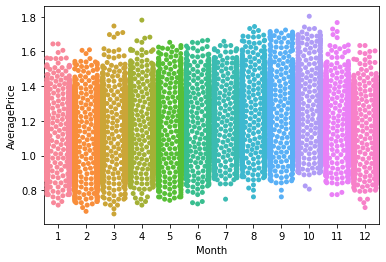

In [28]:
sns.swarmplot(x='Month',y='AveragePrice',data=df)

The average price is higher in 8,9 and 10th months.

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

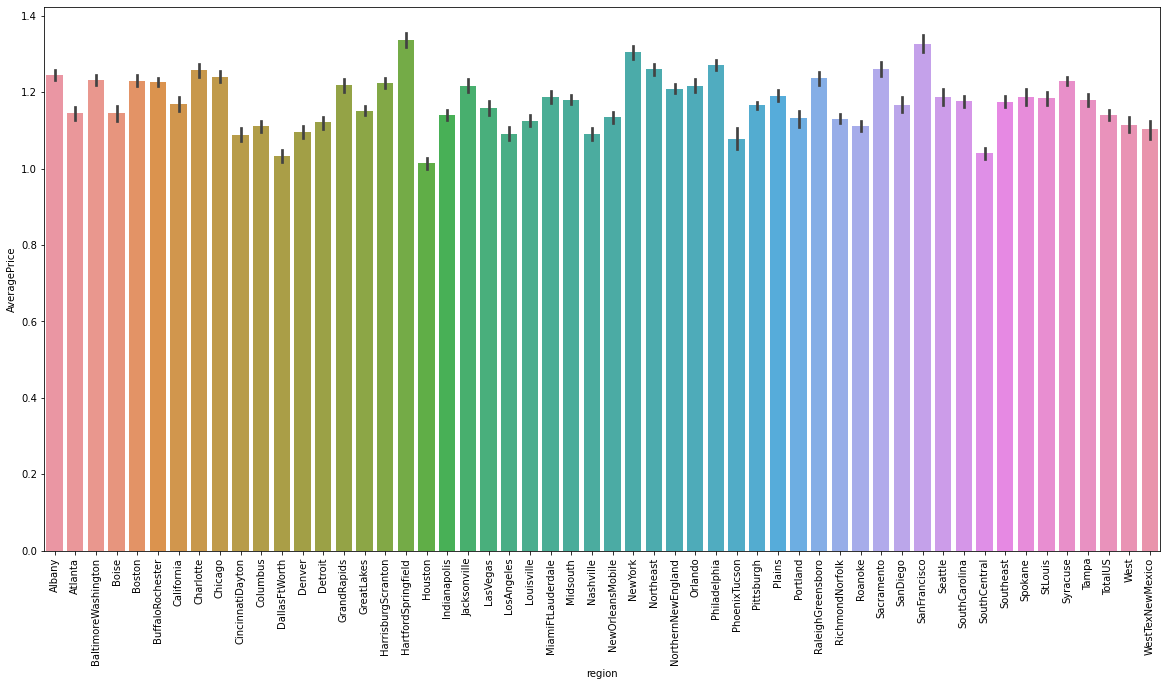

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x='region',y='AveragePrice',data=df)

The average price is high in the regions Sanfrancisco,HartfordSpringfield and Newyork.

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

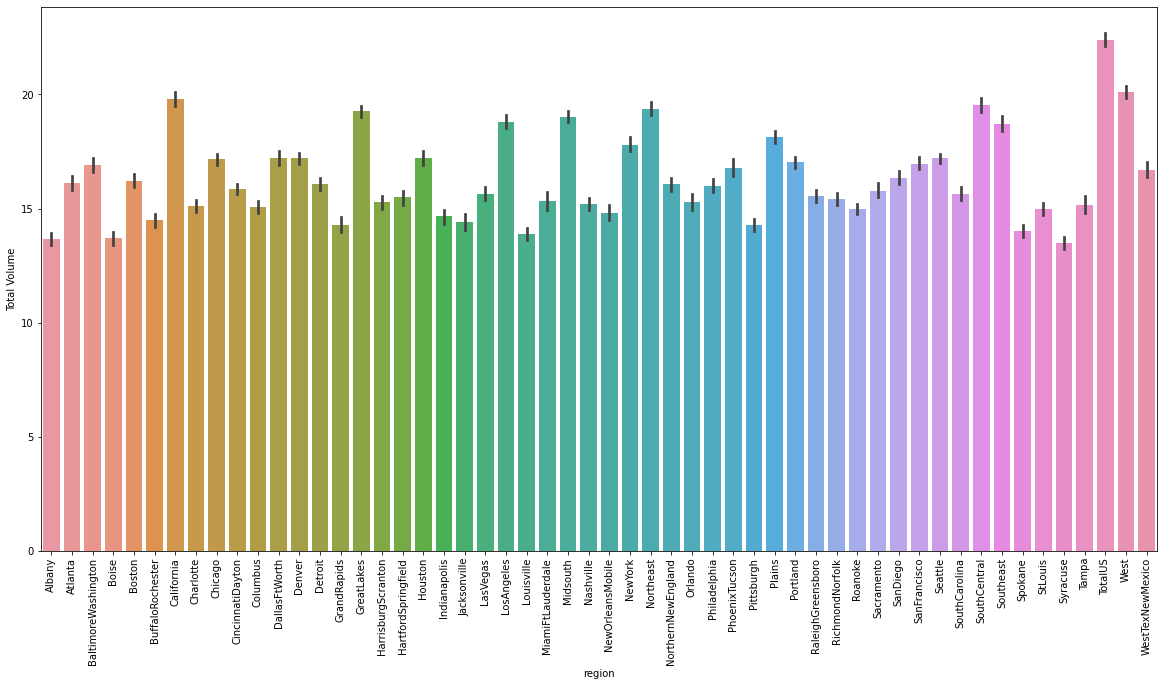

In [30]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x='region',y='Total Volume',data=df)

The total volume is high in the regions TotalUS,California,West,Southcentral and Northeast.

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

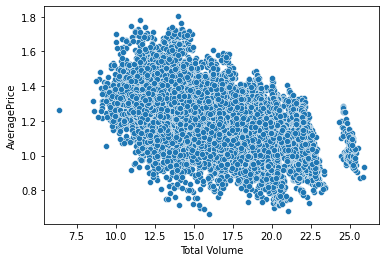

In [31]:
sns.scatterplot(x='Total Volume',y='AveragePrice',data=df)

Total volume and Average price is Negatively correlated.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

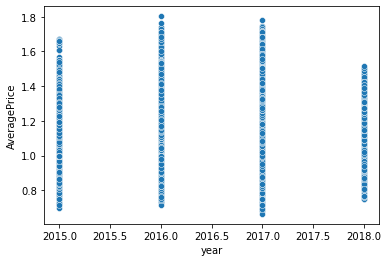

In [32]:
sns.scatterplot(x='year',y='AveragePrice',data=df)

The average price is high in year 2016 and 2017.

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

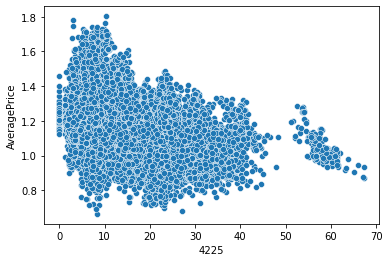

In [33]:
sns.scatterplot(x='4225',y='AveragePrice',data=df)

Negative correlation between 4225 and average price

<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

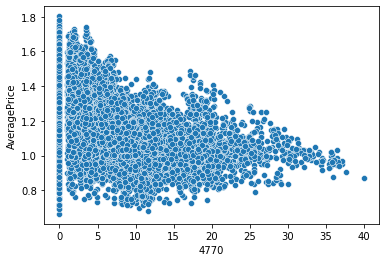

In [34]:
sns.scatterplot(x='4770',y='AveragePrice',data=df)

Negative correlation between Average price and 4770.

<AxesSubplot:xlabel='Total Bags', ylabel='Small Bags'>

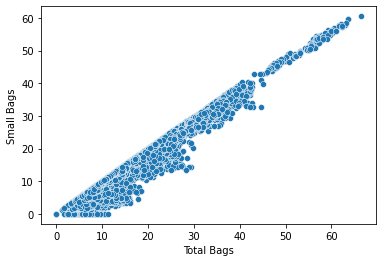

In [35]:
sns.scatterplot(x='Total Bags',y='Small Bags',data=df)

Small bags and total bags are positively correlated.

<AxesSubplot:xlabel='Large Bags', ylabel='Small Bags'>

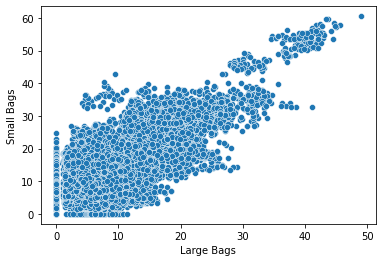

In [36]:
sns.scatterplot(x='Large Bags',y='Small Bags',data=df)

Small bags and Large bags are positively correlated.

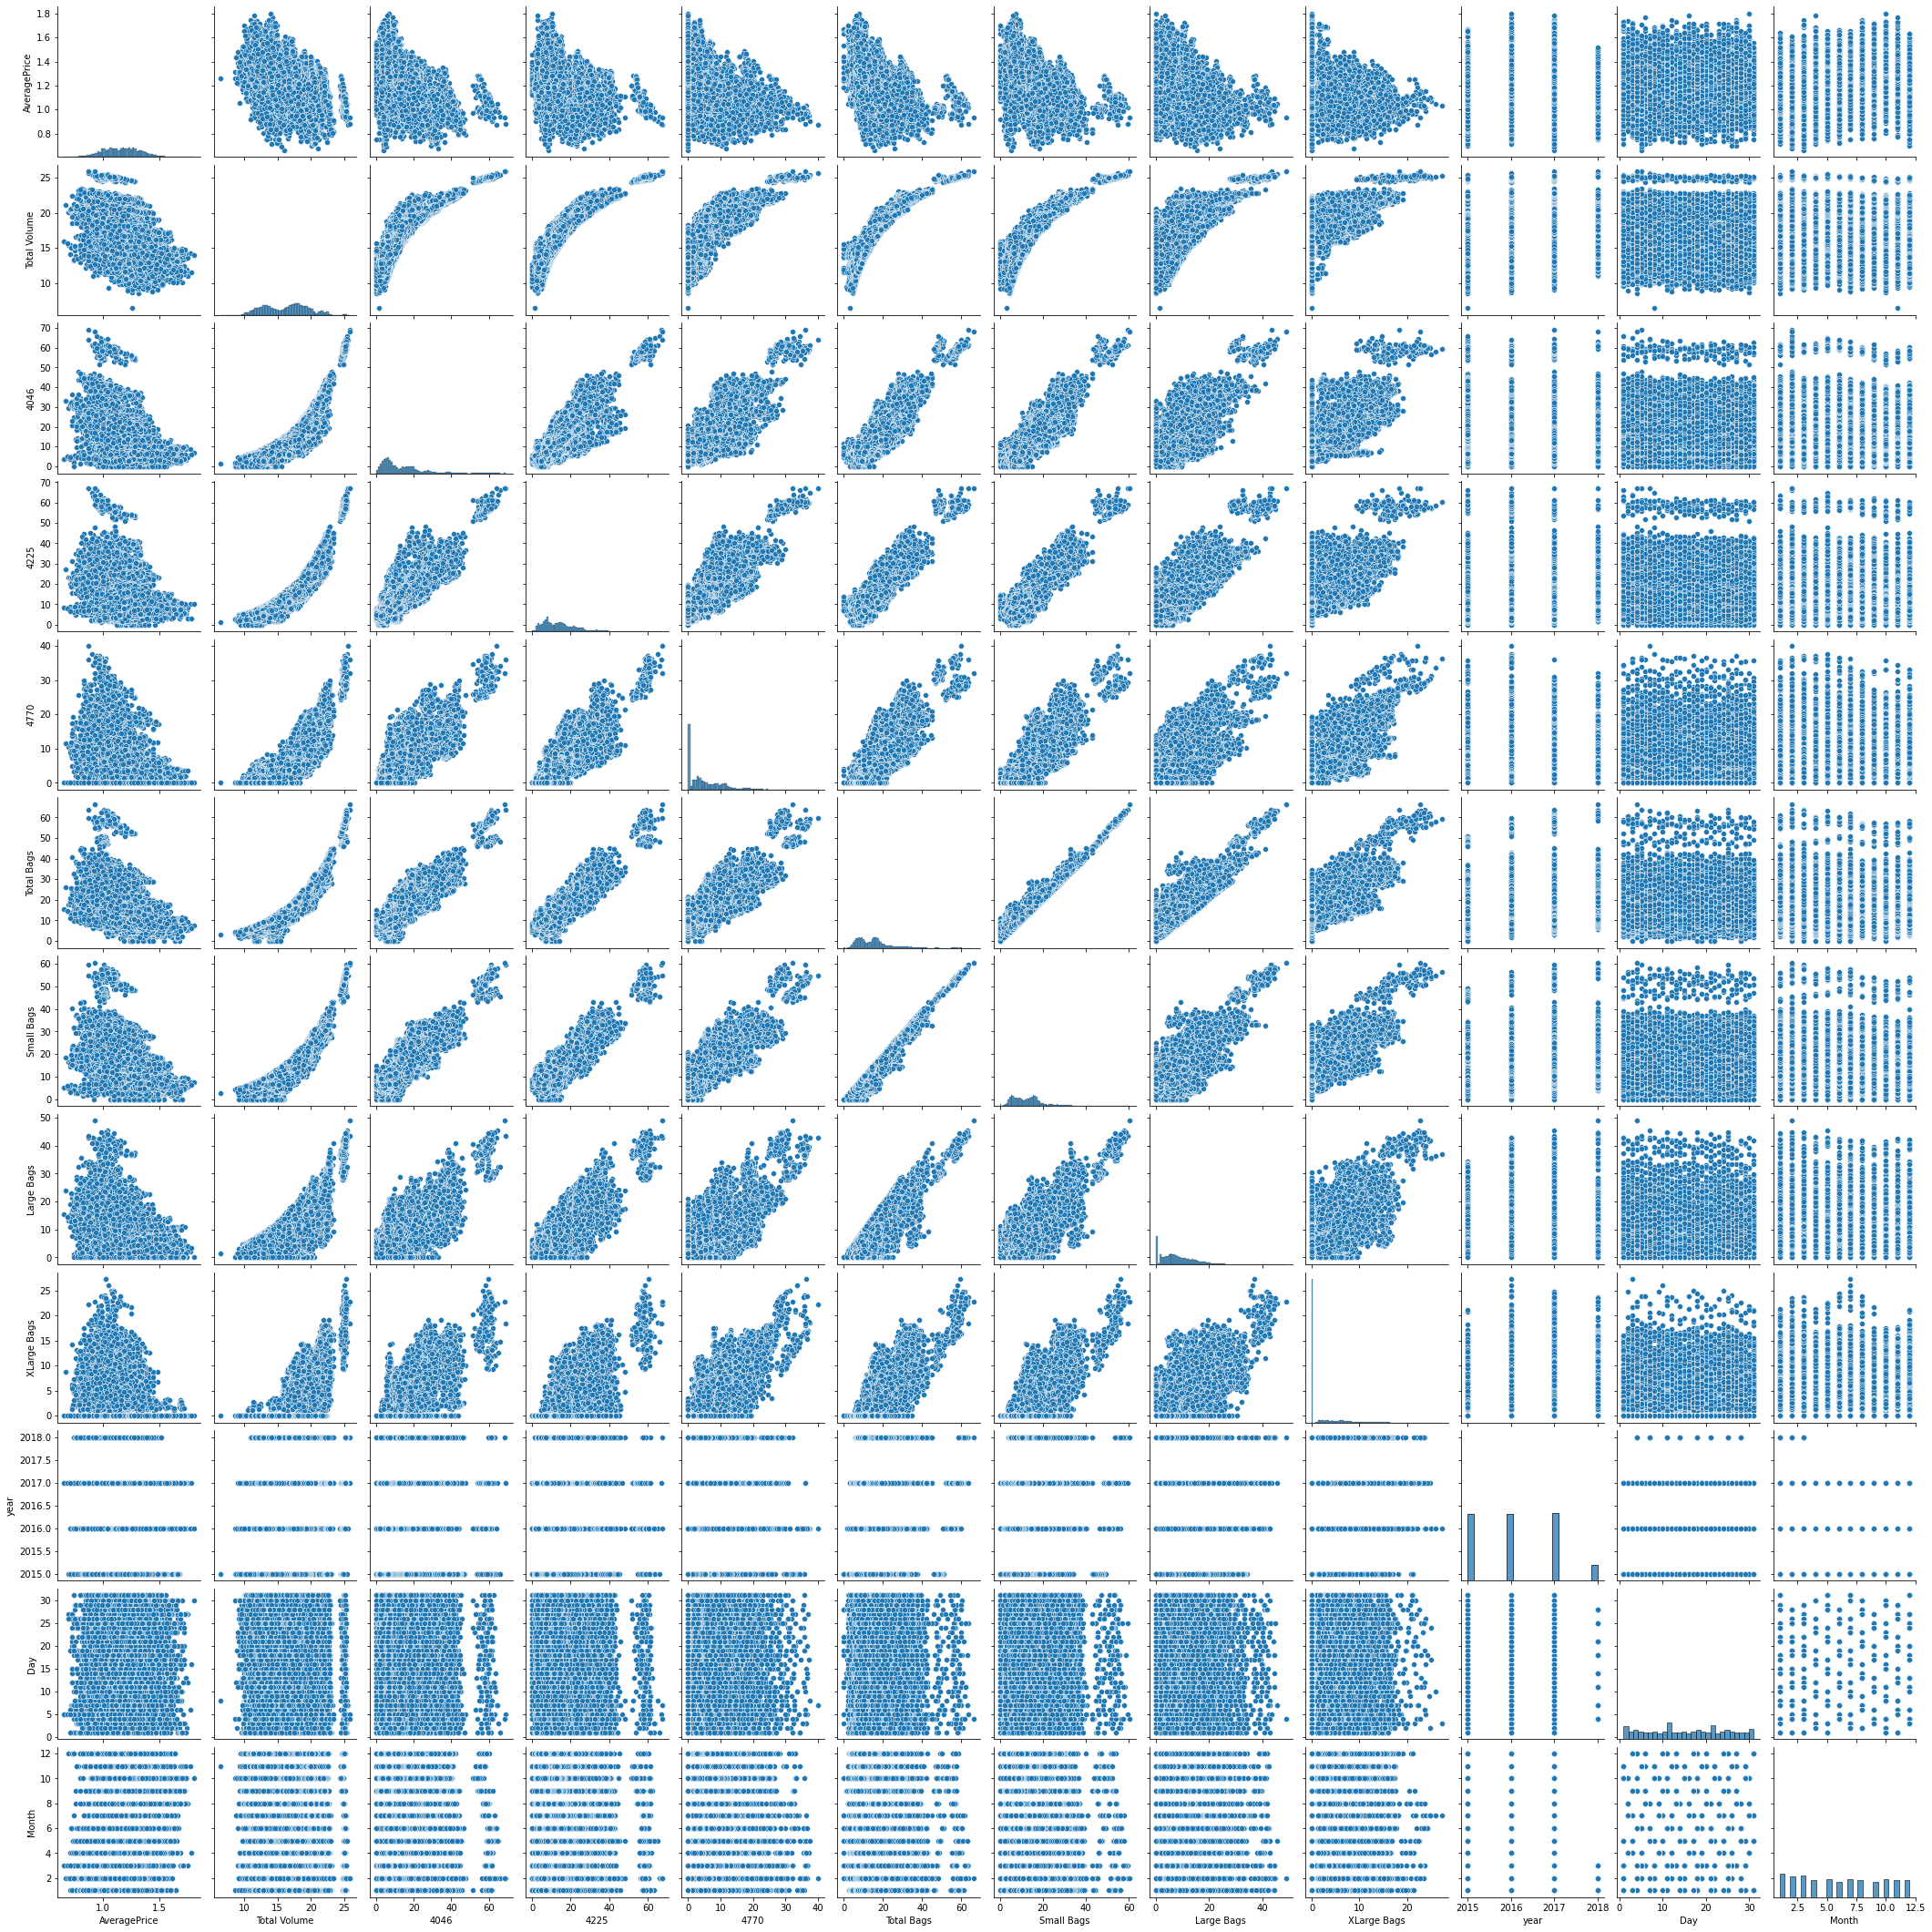

In [37]:
sns.pairplot(df)

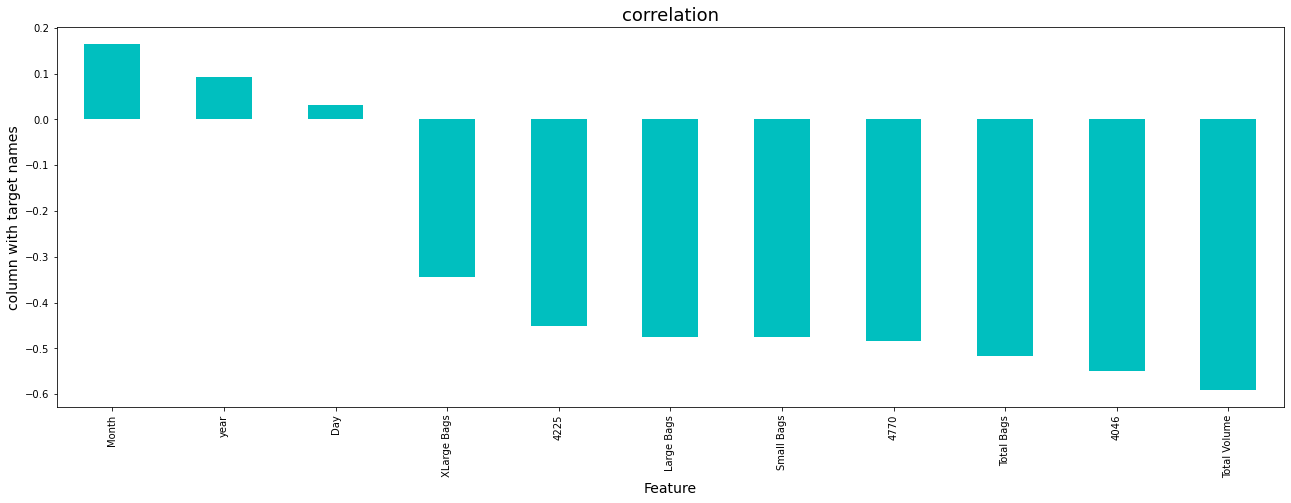

In [38]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [39]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Day               int64
Month             int64
dtype: object

In [40]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

Le=LabelEncoder()
df['type']=Le.fit_transform(df['type'])
df['region']=Le.fit_transform(df['region'])
df.head()

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0      1.153256     15.971108  5.674368  15.275982  2.634339    9.656967   
1      1.161895     15.743913  5.095773  14.535439  2.763586    9.874030   
2      0.964365     16.851117  5.309466  18.176305  3.379890    9.500084   
3      1.039230     16.269422  5.800449  16.379383  2.918799    8.731035   
4      1.131371     15.639329  5.539273  14.469837  2.950453    8.867812   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Day  Month  
0    9.630976    3.107508          0.0     0  2015       0   27     12  
1    9.848614    3.142245          0.0     0  2015       0   20     12  
2    9.469866    3.186814          0.0     0  2015       0   13     12  
3    8.680353    3.400804          0.0     0  2015       0    6     12  
4    8.796074    3.749697          0.0     0  2015       0   29     11

In [41]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  340,   345,   346, ..., 17250, 17303, 17428], dtype=int64), array([2, 2, 2, ..., 0, 0, 0], dtype=int64))


In [42]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (17560, 14)


In [43]:
dataloss=(18249-17560)/18249*100
dataloss

3.775549345169598

After outliers removed data loss is 3.77%.

<AxesSubplot:>

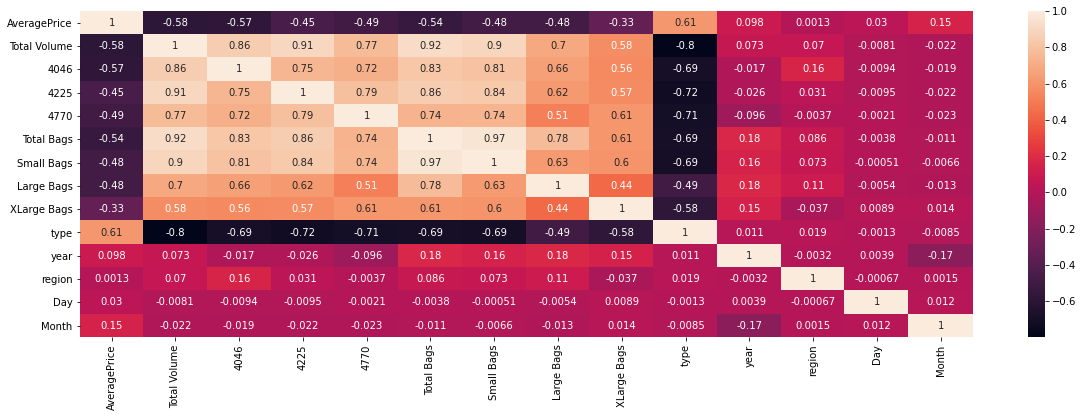

In [44]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True)

Regression Case

In [45]:
# Separating dependent and independent variables

X=df.drop('AveragePrice',axis=1)
Y=df['AveragePrice']
print(X.shape)
print(Y.shape)

(17560, 13)
(17560,)


In [46]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

VIF      Features
0   469.967152  Total Volume
1    13.235454          4046
2    25.672746          4225
3     6.428613          4770
4   325.691127    Total Bags
5   169.861611    Small Bags
6    16.829214    Large Bags
7     2.511525   XLarge Bags
8     6.945552          type
9   277.493239          year
10    4.213014        region
11    4.198834           Day
12    4.074731         Month

There is multicollinearity in Total Volume,Total bags,Small bags and year.

In [47]:
#Dropping Total volume and Total Bags from X.
X=X.drop(['Total Bags','Total Volume'],axis=1)
X

4046       4225      4770  Small Bags  Large Bags  XLarge Bags  \
0      5.674368  15.275982  2.634339    9.630976    3.107508          0.0   
1      5.095773  14.535439  2.763586    9.848614    3.142245          0.0   
2      5.309466  18.176305  3.379890    9.469866    3.186814          0.0   
3      5.800449  16.379383  2.918799    8.680353    3.400804          0.0   
4      5.539273  14.469837  2.950453    8.796074    3.749697          0.0   
...         ...        ...       ...         ...         ...          ...   
18244  6.726317   6.253398  0.000000   10.691594    4.558618          0.0   
18245  5.875458   7.653692  0.000000    9.723774    4.245257          0.0   
18246  5.875729   7.037446  5.194263    9.833855    2.550414          0.0   
18247  6.251792   7.389107  5.192603   10.222358    2.659148          0.0   
18248  7.335057   6.967064  3.870959   10.463764    2.258318          0.0   

       type  year  region  Day  Month  
0         0  2015       0   27     12  
1         0  2015       0   20     12  
2         0  2015       0   13     12  
3         0  2015       0    6     12  
4         0  2015       0   29     11  
...     ...   ...     ...  ...    ...  
18244     1  2018      53    4      2  
18245     1  2018      53   28      1  
18246     1  2018      53   21      1  
18247     1  2018      53   14      1  
18248     1  2018      53    7      1  

[17560 rows x 11 columns]

In [48]:
#Scaling dataponits using standardscaler
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[-0.72679854,  0.1858359 , -0.44891416, ..., -1.69682345,
         1.29028191,  1.639363  ],
       [-0.79361322,  0.09599323, -0.42390672, ..., -1.69682345,
         0.49238353,  1.639363  ],
       [-0.76893653,  0.53770299, -0.30466094, ..., -1.69682345,
        -0.30551485,  1.639363  ],
       ...,
       [-0.70354578, -0.81366297,  0.04639318, ...,  1.7440435 ,
         0.60636901, -1.46574935],
       [-0.66011894, -0.77099952,  0.04607203, ...,  1.7440435 ,
        -0.19152936, -1.46574935],
       [-0.53502615, -0.82220172, -0.20964641, ...,  1.7440435 ,
        -0.98942774, -1.46574935]])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()
ls=Lasso()
rd=Ridge()
sv=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

Linear Regression

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.25,random_state=42)
#Linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.5153618497258883

In [51]:
predlr=lr.predict(x_test)
print('R2 score :',r2_score(y_test,predlr))
print('Mean squared error :',mean_squared_error(y_test,predlr))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predlr)))

R2 score : 0.5103231168957545
Mean squared error : 0.013256425537543077
Root Mean squared error  : 0.11513655170076563


In [52]:
#SVR
sv.fit(x_train,y_train)
sv.score(x_train,y_train)

0.7962744084948146

In [53]:
predsv=sv.predict(x_test)
print('R2 score :',r2_score(y_test,predsv))
print('Mean squared error :',mean_squared_error(y_test,predsv))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predsv)))

R2 score : 0.7811587204794785
Mean squared error : 0.005924423281151399
Root Mean squared error  : 0.0769702753090529


In [60]:
#Lasso
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.0

In [61]:
predls=ls.predict(x_test)
print('R2 score :',r2_score(y_test,predls))
print('Mean squared error :',mean_squared_error(y_test,predls))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predls)))

R2 score : -0.0003031076560287005
Mean squared error : 0.027079987067292522
Root Mean squared error  : 0.16455998015098483


In [54]:
#Ridge
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5153618360103598

In [55]:
predrd=rd.predict(x_test)
print('R2 score :',r2_score(y_test,predrd))
print('Mean squared error :',mean_squared_error(y_test,predrd))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd)))

R2 score : 0.5103215269273784
Mean squared error : 0.013256468580819395
Root Mean squared error  : 0.11513673862334035


In [56]:
#Decision tree
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [57]:
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.7482436593732824
Mean squared error : 0.006815492620287586
Root Mean squared error  : 0.08255599687659029


In [58]:
#Random forest
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9845857201422261

In [59]:
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.8854070718373794
Mean squared error : 0.003102234701558106
Root Mean squared error  : 0.055697708225366925


Cross validation

In [62]:
from sklearn.model_selection import cross_val_score
#linear
score=cross_val_score(lr,X_scale,Y,cv=5)
print(score)
print(score.mean())

[-0.32058077  0.23890994  0.37019177  0.13209163  0.15082283]
0.1142870821632483


In [64]:
#Lasso
score=cross_val_score(ls,X_scale,Y,cv=5)
print(score)
print(score.mean())

[-3.12357885 -0.61119689 -0.08254112 -0.46000076 -0.88216126]
-1.0318957765193375


In [65]:
#Ridge
score=cross_val_score(rd,X_scale,Y,cv=5)
print(score)
print(score.mean())

[-0.32044545  0.23894991  0.37022142  0.13208444  0.15083104]
0.1143282723527137


In [66]:
#SVR
score=cross_val_score(sv,X_scale,Y,cv=5)
print(score)
print(score.mean())

[-0.45846605  0.44509097  0.12416557  0.31384312  0.07676656]
0.10028003394407078


In [67]:
#Decision tree
score=cross_val_score(dt,X_scale,Y,cv=5)
print(score)
print(score.mean())

[-0.87059854  0.1208208   0.0931986  -0.3321156  -0.37490137]
-0.2727192209797005


In [68]:
#Random forest
score=cross_val_score(rf,X_scale,Y,cv=5)
print(score)
print(score.mean())

[-0.08638974  0.51414341  0.63943071  0.22338082  0.03283417]
0.2646798742853175


Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
#Linear

grid_para={'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'positive':[True,False],'n_jobs':range(1,50,2)}
grid_search=GridSearchCV(estimator=lr,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': range(1, 50, 2), 'normalize': [True, False],
                         'positive': [True, False]})

In [70]:
best_para=grid_search.best_params_
print(best_para)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True, 'positive': False}


In [71]:
Lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True,positive=False)
Lr.fit(x_train,y_train)
predLr=Lr.predict(x_test)
print('R2 score :',r2_score(y_test,predLr))
print('Mean squared error :',mean_squared_error(y_test,predLr))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predLr)))

R2 score : 0.5103231168957545
Mean squared error : 0.013256425537543078
Root Mean squared error  : 0.11513655170076563


In [72]:
#SVR
grid_para={'gamma':['scale','auto'],'cache_size':range(1,10,2),'kernel':['linear','poly','rbf'],'tol':[0.5,1,1.5,2,2.5]}
grid_search=GridSearchCV(estimator=sv,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'cache_size': range(1, 10, 2),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.5, 1, 1.5, 2, 2.5]})

In [73]:
best_para=grid_search.best_params_
print(best_para)

{'cache_size': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.5}


In [74]:
sv=SVR(cache_size=1,gamma='auto',kernel='rbf',tol=0.5)
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print('R2 score :',r2_score(y_test,predsv))
print('Mean squared error :',mean_squared_error(y_test,predsv))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predsv)))


R2 score : 0.5568156592074591
Mean squared error : 0.011997789595206839
Root Mean squared error  : 0.10953442196500075


In [75]:
#DTR
grid_para={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,1),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dt,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [76]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'max_depth': 17, 'max_features': 'auto', 'min_samples_split': 19, 'splitter': 'best'}


In [77]:
dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=17,max_features='auto',min_samples_split=19,splitter='best')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.7680893333734806
Mean squared error : 0.006278234871957298
Root Mean squared error  : 0.0792353132886928


In [78]:
#Random Forest
grid_para={'criterion':['squared_error','absolute_error','poisson'],'max_depth':range(2,20,2),'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rf,param_grid=grid_para,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'log2', 'sqrt']})

In [79]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'poisson', 'max_depth': 18, 'max_features': 'log2'}


In [80]:
rf=RandomForestRegressor(criterion='poisson',max_depth=18,max_features='log2')
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.46978057908423654
Mean squared error : 0.014353984258702877
Root Mean squared error  : 0.1198081143274648


Text(0, 0.5, 'Predicted data')

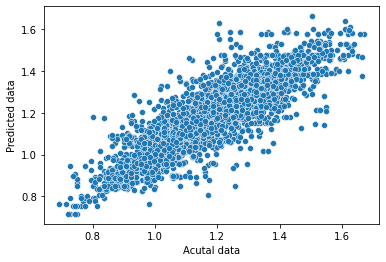

In [81]:
sns.scatterplot(x=y_test,y=preddt)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

The Decision Tree model is the best model with r2 Score of 76.80%.

Classification Case

In [82]:
# Separating dependent and independent variables

X=df.drop('region',axis=1)
Y=df['region']
print(X.shape)
print(Y.shape)

(17560, 13)
(17560,)


In [83]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

VIF      Features
0   107.191142  AveragePrice
1   473.001521  Total Volume
2    12.929380          4046
3    27.130711          4225
4     6.456161          4770
5   339.560559    Total Bags
6   177.974917    Small Bags
7    16.892136    Large Bags
8     2.526190   XLarge Bags
9     7.864795          type
10  394.934346          year
11    4.204210           Day
12    4.260183         Month

Multicollinearity is present.

In [84]:
#Dropping Total volume and Small Bags from X.
X=X.drop(['Small Bags','Total Volume'],axis=1)
X

AveragePrice      4046       4225      4770  Total Bags  Large Bags  \
0          1.153256  5.674368  15.275982  2.634339    9.656967    3.107508   
1          1.161895  5.095773  14.535439  2.763586    9.874030    3.142245   
2          0.964365  5.309466  18.176305  3.379890    9.500084    3.186814   
3          1.039230  5.800449  16.379383  2.918799    8.731035    3.400804   
4          1.131371  5.539273  14.469837  2.950453    8.867812    3.749697   
...             ...       ...        ...       ...         ...         ...   
18244      1.276715  6.726317   6.253398  0.000000   10.778858    4.558618   
18245      1.307670  5.875458   7.653692  0.000000    9.810914    4.245257   
18246      1.367479  5.875729   7.037446  5.194263    9.844959    2.550414   
18247      1.389244  6.251792   7.389107  5.192603   10.234040    2.659148   
18248      1.272792  7.335057   6.967064  3.870959   10.469435    2.258318   

       XLarge Bags  type  year  Day  Month  
0              0.0     0  2015   27     12  
1              0.0     0  2015   20     12  
2              0.0     0  2015   13     12  
3              0.0     0  2015    6     12  
4              0.0     0  2015   29     11  
...            ...   ...   ...  ...    ...  
18244          0.0     1  2018    4      2  
18245          0.0     1  2018   28      1  
18246          0.0     1  2018   21      1  
18247          0.0     1  2018   14      1  
18248          0.0     1  2018    7      1  

[17560 rows x 11 columns]

In [85]:
#Scaling dataponits using standardscaler
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scal=scale.fit_transform(X)
X_scal

array([[-0.14658967, -0.72679854,  0.1858359 , ..., -1.20716224,
         1.29028191,  1.639363  ],
       [-0.09440007, -0.79361322,  0.09599323, ..., -1.20716224,
         0.49238353,  1.639363  ],
       [-1.28774574, -0.76893653,  0.53770299, ..., -1.20716224,
        -0.30551485,  1.639363  ],
       ...,
       [ 1.1476056 , -0.70354578, -0.81366297, ...,  1.98527283,
         0.60636901, -1.46574935],
       [ 1.27909518, -0.66011894, -0.77099952, ...,  1.98527283,
        -0.19152936, -1.46574935],
       [ 0.57556776, -0.53502615, -0.82220172, ...,  1.98527283,
        -0.98942774, -1.46574935]])

In [86]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

svc=SVC()
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scal,Y,test_size=0.25,random_state=42)

#SVC
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)

0.7823842065299924

In [88]:
predsvc=svc.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,predsvc))
print('Confusion matrix :',confusion_matrix(ytest,predsvc))

Accuracy score : 0.7312072892938497
Confusion matrix : [[83  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  7  0 ...  0  0 53]]


In [89]:
#Logistic regression
lg.fit(xtrain,ytrain)
lg.score(xtrain,ytrain)

0.5223234624145786

In [90]:
predlg=lg.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,predlg))
print('Confusion matrix :',confusion_matrix(ytest,predlg))

Accuracy score : 0.5134396355353075
Confusion matrix : [[56  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  1]
 [ 0  0 58 ...  0  0  3]
 ...
 [ 0  0  0 ... 44  1  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  8  0 ...  0  0 12]]


In [91]:
#KNN
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)

0.7497342444950645

In [92]:
predknn=knn.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,predknn))
print('Confusion matrix :',confusion_matrix(ytest,predknn))

Accuracy score : 0.5621867881548975
Confusion matrix : [[63  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  7  1 ...  0  0 40]]


In [93]:
#Decision tree
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)

1.0

In [94]:
preddtc=dtc.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,preddtc))
print('Confusion matrix :',confusion_matrix(ytest,preddtc))

Accuracy score : 0.7813211845102506
Confusion matrix : [[75  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  2]
 [ 0  0 73 ...  0  0  1]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  2  1 ...  0  0 62]]


In [95]:
#Random forest
rfc.fit(xtrain,ytrain)
rfc.score(xtrain,ytrain)

1.0

In [96]:
predrfc=rfc.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,predrfc))
print('Confusion matrix :',confusion_matrix(ytest,predrfc))

Accuracy score : 0.9025056947608201
Confusion matrix : [[82  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 84 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  2  0 ...  0  0 70]]


Cross validation

In [97]:
#SVC
score=cross_val_score(svc,X_scal,Y,cv=5)
print(score)
print(score.mean())

[0.62613895 0.67539863 0.58485194 0.47038724 0.37357631]
0.5460706150341685


In [98]:
#Logistic regression
score=cross_val_score(lg,X_scal,Y,cv=5)
print(score)
print(score.mean())

[0.46269932 0.43963554 0.46953303 0.31862187 0.23747153]
0.3855922551252847


In [99]:
#KNN
score=cross_val_score(knn,X_scal,Y,cv=5)
print(score)
print(score.mean())

[0.45700456 0.48063781 0.39037585 0.28246014 0.25085421]
0.3722665148063781


In [100]:
#DTC
score=cross_val_score(dtc,X_scal,Y,cv=5)
print(score)
print(score.mean())

[0.47636674 0.6227221  0.59794989 0.50968109 0.41343964]
0.5240318906605922


In [101]:
#Random forest
score=cross_val_score(rfc,X_scal,Y,cv=5)
print(score)
print(score.mean())

[0.64322323 0.78843964 0.74345103 0.68451025 0.47636674]
0.6671981776765376


Hyperparameter Tuning

In [102]:
#SVC
grid_para={'gamma':['scale','auto'],'kernel':['linear','poly','rbf'],'tol':[0.5,1,1.5,2,2.5]}
grid_search=GridSearchCV(estimator=svc,param_grid=grid_para,cv=5)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.5, 1, 1.5, 2, 2.5]})

In [103]:
best_para=grid_search.best_params_
print(best_para)

{'gamma': 'scale', 'kernel': 'rbf', 'tol': 2}


In [104]:
svc=SVC(kernel='rbf',tol=2,gamma='scale') 
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,predsvc))
print('Confusion matrix',confusion_matrix(ytest,predsvc))

Accuracy score : 0.7125284738041002
Confusion matrix [[69  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 70 ...  0  0  1]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  1  0 ...  0  0 65]]


In [105]:
#KNN
grid_para={'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':[5,10,15,20],'weights':['uniform','distance']}
grid_search=GridSearchCV(estimator=knn,param_grid=grid_para,cv=5)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']})

In [106]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [107]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=5,weights='distance')
knn.fit(xtrain,ytrain)
predknn=knn.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,predknn))
print('Confusion matrix :',confusion_matrix(ytest,predknn))

Accuracy score : 0.5749430523917995
Confusion matrix : [[53  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 69 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  1  0 ...  0  0 51]]


In [108]:
#DTC
grid_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,2),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_para,cv=5)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [109]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}


In [110]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=19,max_features='auto',min_samples_split=2,splitter='best')
dtc.fit(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,preddtc))
print('Confusion matrix :',confusion_matrix(ytest,preddtc))

Accuracy score : 0.7193621867881549
Confusion matrix : [[62  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  2]
 ...
 [ 0  0  0 ... 42  3  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  2  1 ...  0  0 59]]


In [111]:
#Random forest
grid_para={'criterion':['gini','entropy'],'bootstrap':[True,False],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=5)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'sqrt']})

In [112]:
best_para=grid_search.best_params_
print(best_para)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto'}


In [113]:
rfc=RandomForestClassifier(bootstrap=False,criterion='gini',max_features='auto')
rfc.fit(xtrain,ytrain)
predrfc=rfc.predict(xtest)
print('Accuracy score :',accuracy_score(ytest,predrfc))
print('Confusion matrix :',confusion_matrix(ytest,predrfc))

Accuracy score : 0.9075170842824601
Confusion matrix : [[82  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  0]
 [ 0  0 84 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  2  0 ...  0  0 72]]


The model Random forest classifier is the best model with accuracy score of 90%.

In [115]:
import pickle
filename="Avocado.pkl"
pickle.dump(rfc,open(filename, 'wb'))

Conclusion

In [117]:
model=pickle.load(open("Avocado.pkl",'rb'))
result=model.score(xtest,ytest)
print('The Accuracy score of the model : ',result*100)

The Accuracy score of the model :  90.75170842824602
